In [ ]:
!pip install mahotas
from pylab import imshow
import numpy as np
import mahotas as mh
import mahotas.demos
import cv2

     |████████████████████████████████| 5.7MB 7.8MB/s 


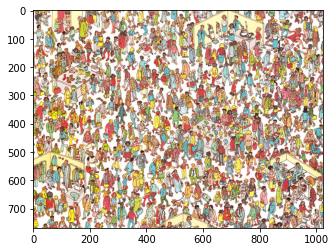

In [ ]:
waldo = mh.demos.load('wally')
imshow(waldo)

In [ ]:
waldo_float = waldo.astype(float)
r,g,b = waldo_float.transpose((2,0,1))
# w is the color white's channel
w = waldo_float.mean(2)

In [ ]:
pattern = np.ones((24,16), float)
for i in range(2):
    pattern[i::4] = -1

# w white's channel: r red
shirt_pattern = mh.convolve(r-w, pattern)

In [ ]:
mask = (shirt_pattern == shirt_pattern.max())
mask = mh.dilate(mask,np.ones((48,24)))
# pattern = np.ones((24,16), float)
# for i in range(2):
#     pattern[i::4] = -1
waldo -= np.array(.8 * waldo * ~mask[:,:,None], dtype=waldo.dtype)

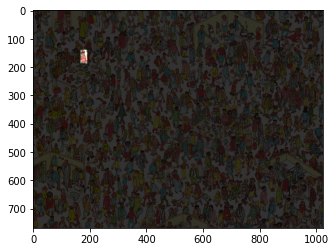

In [ ]:
imshow(waldo)

In [ ]:
cv2.imwrite ('/content/wally_output.jpg', waldo)

True

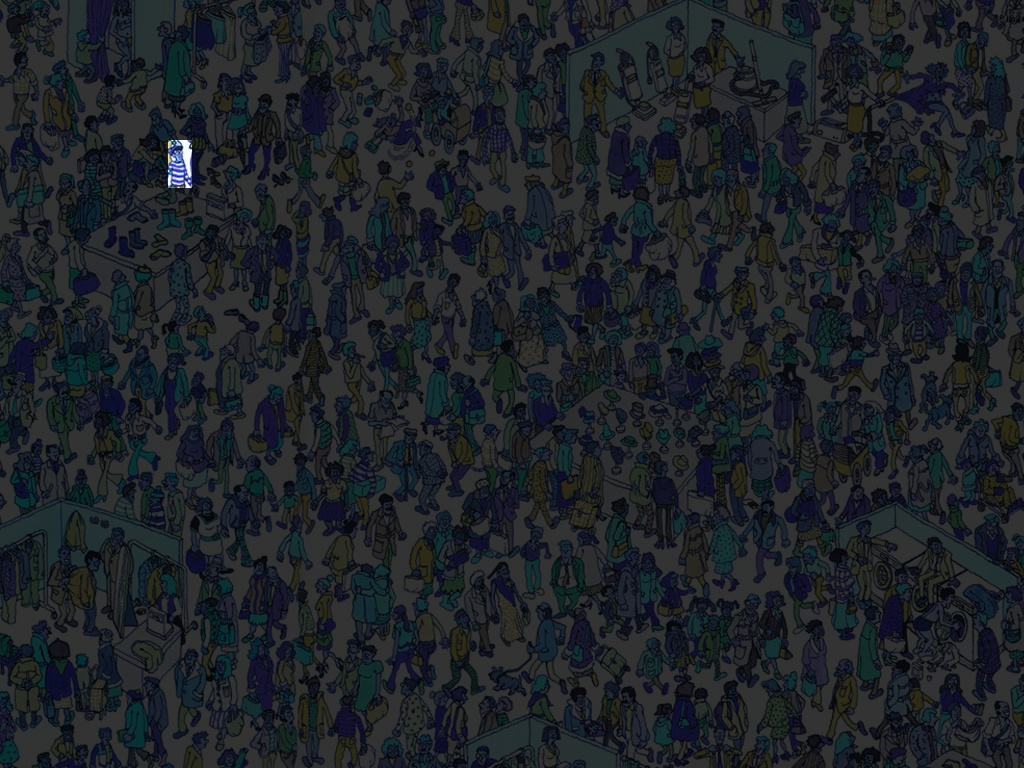

In [ ]:
from IPython.display import Image
Image('wally_output.jpg')